In [1]:
import itertools
from tqdm import tqdm
from time import sleep
from math import sqrt
from multiprocessing import Pool

import matplotlib
from matplotlib import pyplot as plt

import numpy as np

font = {'size'   : 17}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]= 7, 5
#plt.rcParams['figure.dpi'] = 90
matplotlib.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True

In [2]:
def rg(w,D,ed):
    d = 1
    deltaed = -4 * d * ed / ((w - D/2)**2 - ed**2)  # rg equation for |e_D|, with Delta (:= V^2  rho)=1
    if ed * (ed + deltaed) <= 0:
        return 0
    else:
        return ed+deltaed

In [10]:
def complete_rg(w, D0, ed):
    N = D0*10
    x = []
    y = []
    z = []
    den = (w - D0/2)**2 - ed**2
    count = N+1
    for D in np.linspace(D0, 0, N):
        count -= 1
        if den * ((w - D/2)**2 - ed**2) <= 0 or ed == 0:
            return x, y, z, True
            # return D, ed, count, True
        den = (w - D/2)**2 - ed**2
        x.append(D)
        y.append(ed)
        z.append(count)
        ed = rg(w, D, ed)
    return x, y, z, False

## Relevant and Irrelevant Flows

True
False


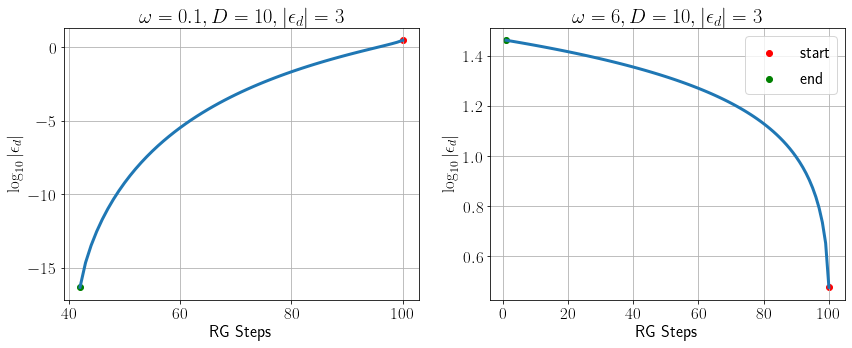

In [16]:
ed = 3
D0 = 10
fig, ax = plt.subplots(1,2,figsize=(14,5))
for w in [0.1, 6]:
    x, y, z, flag = complete_rg(w, D0, ed)
    y = np.log10(y)
    print (flag)
    ax[int(w>1)].plot(z, y)
    ax[int(w>1)].scatter(z[0], y[0], marker="o", color='r', label=r"start")
    ax[int(w>1)].scatter(z[-1], y[-1], marker="o", color='g', label=r"end")
    ax[int(w>1)].set_title(r"$\omega={}, D={}, |\epsilon_d|={}$".format(w,D0,ed))
    ax[int(w>1)].set_xlabel(r"RG Steps")
    ax[int(w>1)].set_ylabel(r"$\log_{10}|\epsilon_d|$")

plt.legend()
plt.show()

## Change in relevant $|\epsilon_d|^*$ with increase in bandwidth

10
110
210
310
410
510
610
710
810
910


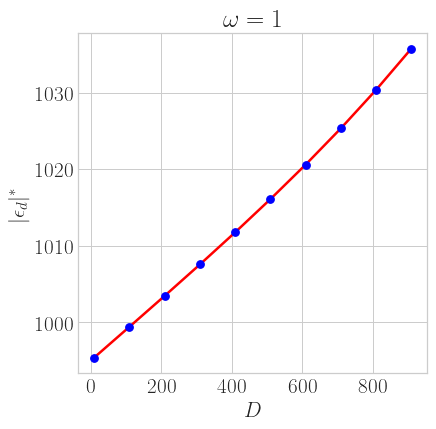

In [23]:
edfp = []
D0_range = np.arange(10, 1010, 100)
for D0 in D0_range:
   print (D0)
   w = 1
   ed_range = np.arange(0, 1000, 5)
   ed_max = ed_range[0]
   for ed in ed_range:
       x, y, z, flag = complete_rg(w, D0, ed)
       if y != [] and ed_max < y[-1]:
           ed_max = y[-1]
   edfp.append(ed_max)

plt.title(r"$\omega = 1$")
plt.plot(D0_range, edfp, color="r", marker="o", mec="b", mfc="b")
plt.ylabel(r"$|\epsilon_d|^*$")
plt.xlabel(r"$D$")
plt.show()

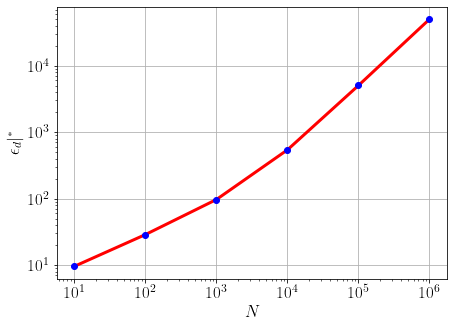

In [25]:
# edfp = []
# ed_0 = 1
# D0_range = 10**np.arange(6)
# for D0 in D0_range:
#     print (D0)
#     w = D0/2
#     D, ed, count, flag = complete_rg(w, D0, ed_0)
#     edfp.append(ed[-1])

# plt.title(r"$\omega = \frac{D_0}{2}, |\epsilon_d|=1$")
plt.plot(D0_range*10, edfp, color="r", marker="o", mec="b", mfc="b")
plt.ylabel(r"$\epsilon_d|^*$")
plt.xlabel(r"$N$")
plt.yscale("log")
plt.xscale("log")
plt.show()